         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.423294     2.006591     0.395558    -0.540912     0.461507   
std       5.772147     5.034043     2.430171     2.274880     2.528174   
min     -15.683735   -16.725007    -8.459430    -7.456052    -9.944086   
25%      -3.655086    -0.979035    -1.072519    -2.111310    -1.063989   
50%       0.353793     2.321397     0.463736    -0.607192     0.536008   
75%       4.680916     5.316025     2.034754     0.979168     2.196869   
max      18.704731    16.985102     7.300535     7.460633     8.667679   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.538549     0.554395     0.458231    -0.140578    -0.382222  ...   
std       2.278681     2.120906     2.235937     2.509818     2.507247  ...   
min      -8.23334

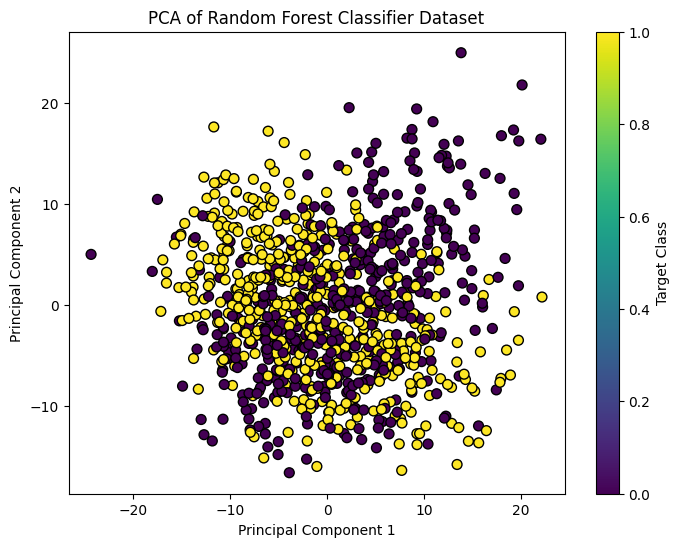

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)

# visualize the first few rows of the dataset
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y
print(df.describe())

# pca to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
            cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Random Forest Classifier Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')

plt.show()


In [10]:


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf
    random_state=42
)

rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8900

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       106
           1       0.89      0.87      0.88        94

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [ ]:
estimator = rf_classifier.estimators_[5]

from sklearn.tree import export_graphviz
# 导出为dot 文件
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = pd.DataFrame(X).columns.astype(str).tolist(),
                class_names = ['Class 0', 'Class 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# 用系统命令转为PNG文件(需要 Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# 在jupyter notebook中展示
# from IPython.display import Image
# Image(filename = 'tree.png')

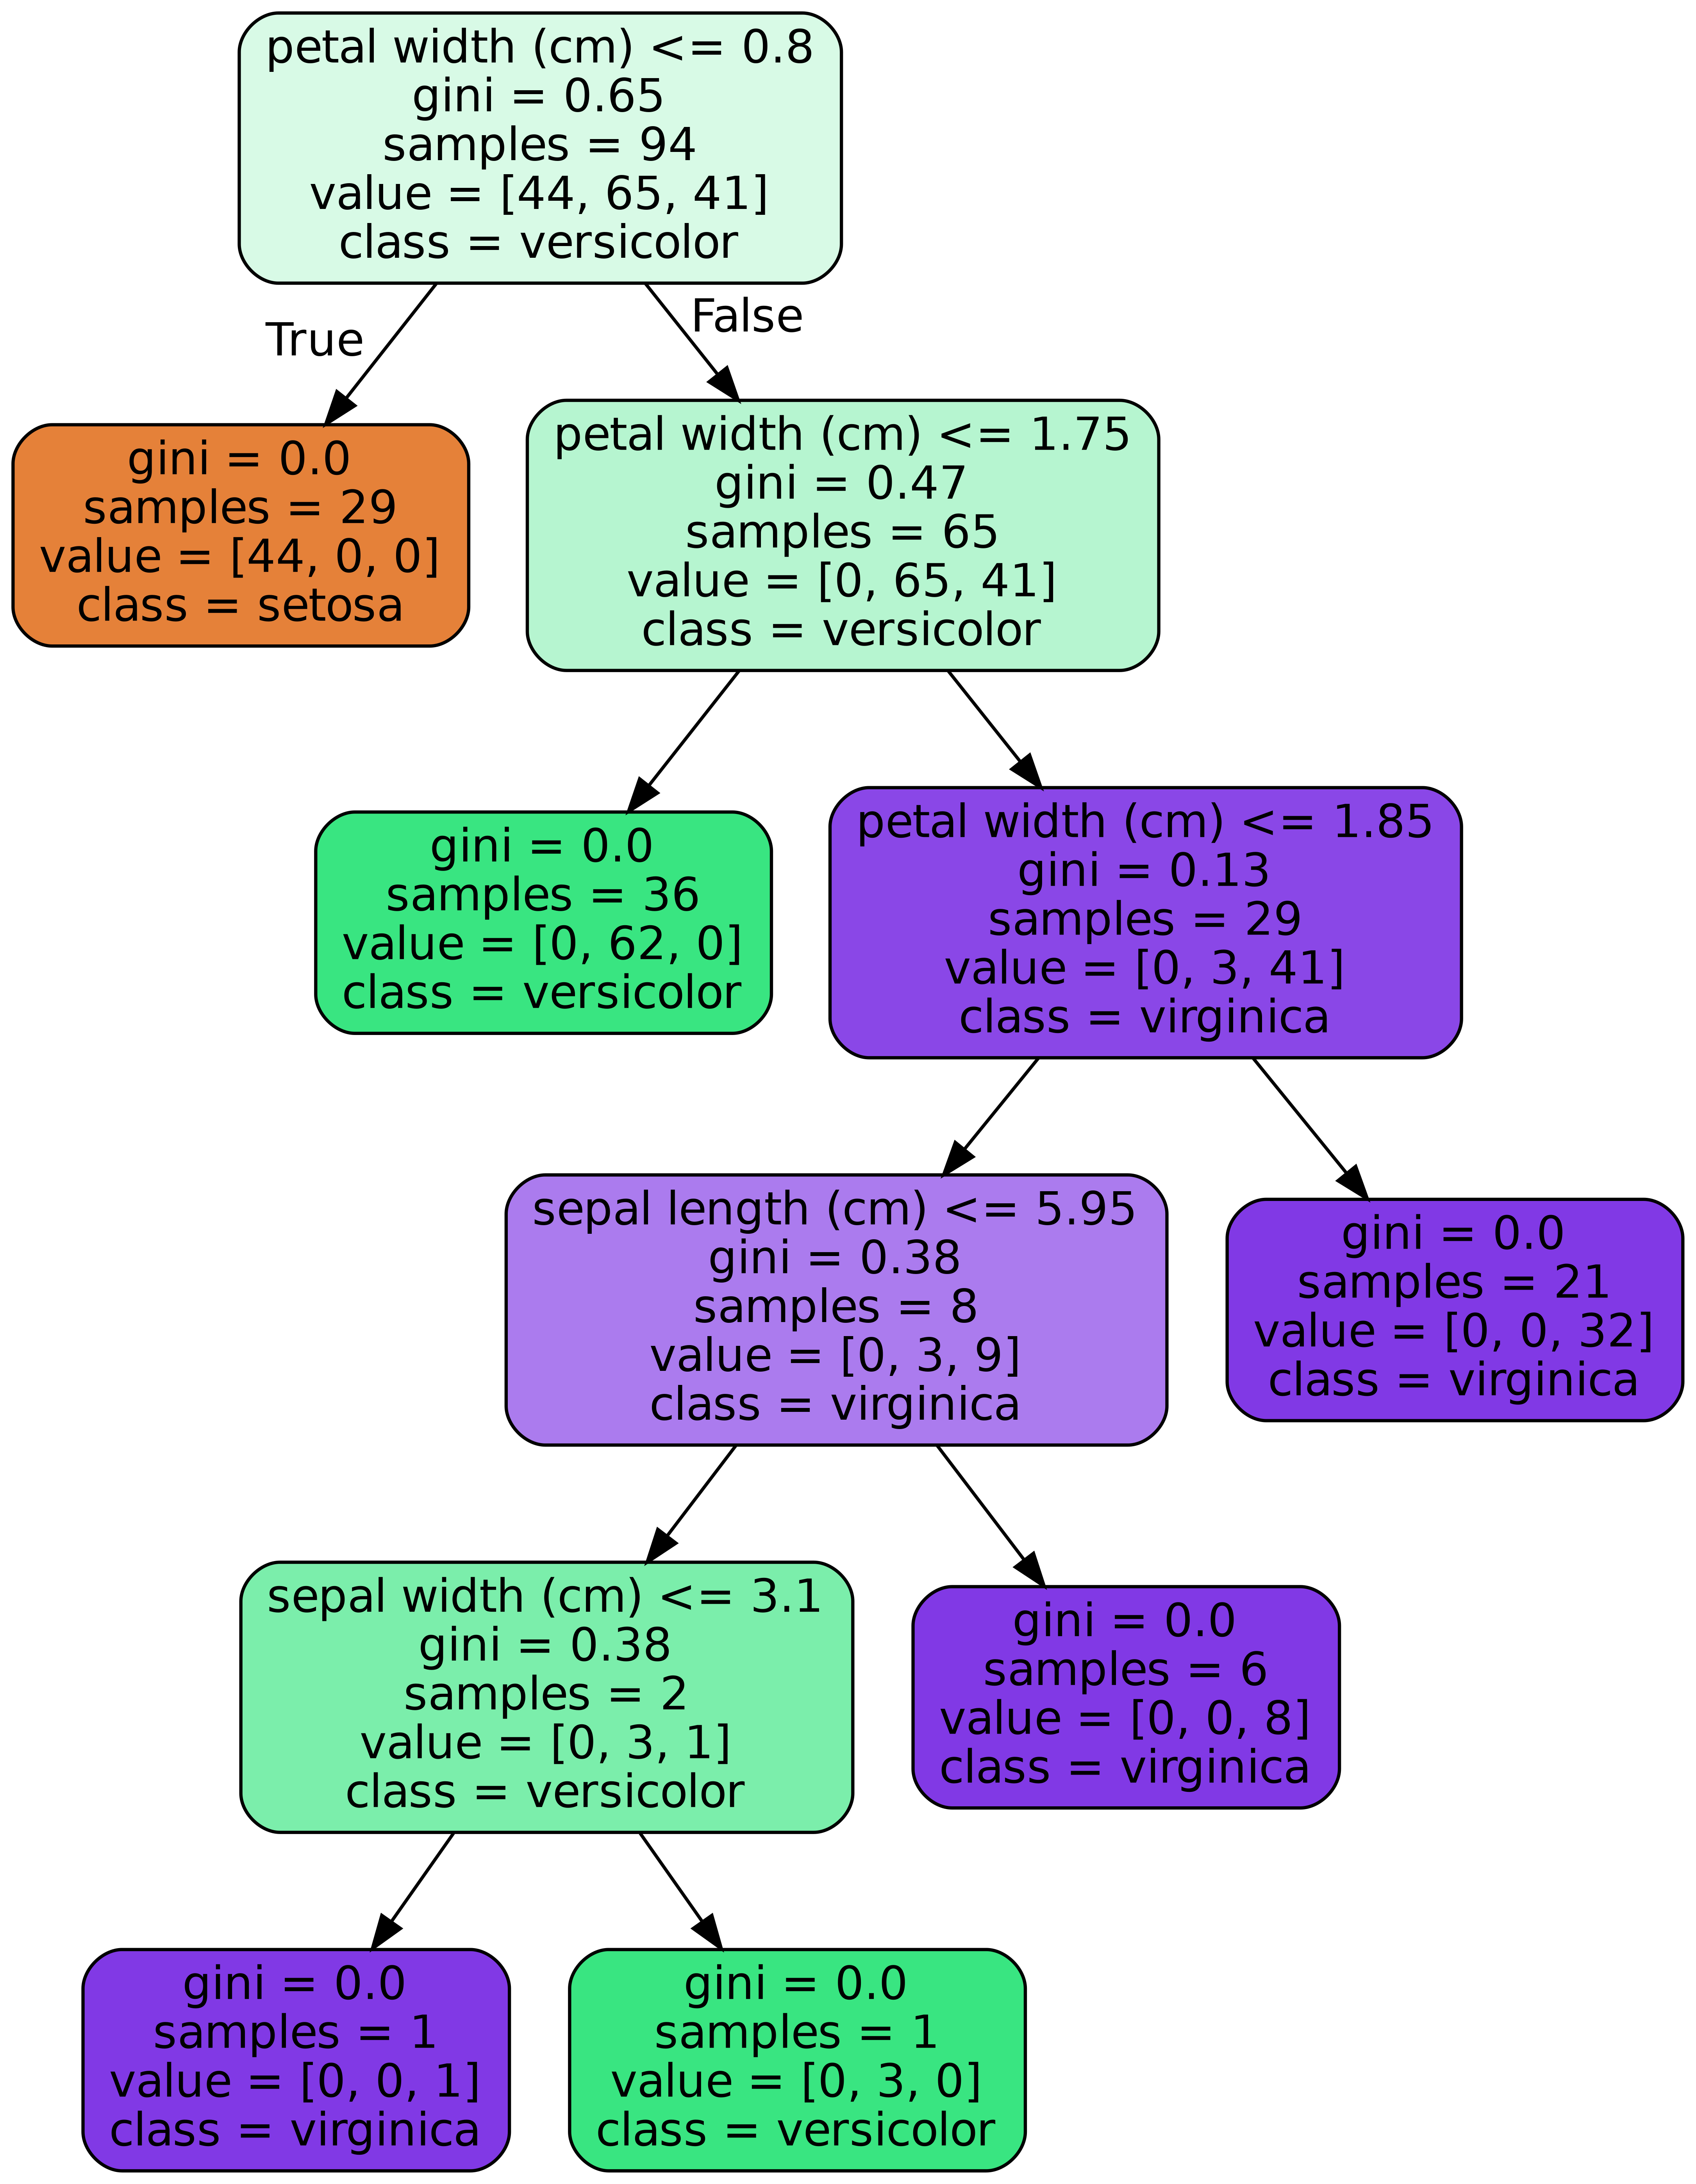

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

# 模型(也可用单个决策树)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# 训练
model.fit(iris.data, iris.target)
# 提取一个决策树
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# 导出为dot 文件
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# 用系统命令转为PNG文件(需要 Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# 在jupyter notebook中展示
from IPython.display import Image
Image(filename = 'tree.png')